<a href="https://colab.research.google.com/github/jigarsanghavi/dogbreed_classifier/blob/master/dog_breed_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip

--2020-05-14 11:57:26--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.116.104
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.116.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  20.2MB/s    in 53s     

2020-05-14 11:58:20 (20.2 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]



In [2]:
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip

--2020-05-14 11:58:23--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.112.240
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.112.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196739509 (188M) [application/zip]
Saving to: ‘lfw.zip’

lfw.zip             100%[===================>] 187.62M  20.5MB/s    in 10s     

2020-05-14 11:58:34 (18.6 MB/s) - ‘lfw.zip’ saved [196739509/196739509]



In [0]:
!unzip dogImages.zip

In [0]:
!unzip lfw.zip

In [0]:
import tensorflow as tf
import os
from os import listdir
import numpy as np
import pandas as pd
import cv2
from fastai.vision import *
import matplotlib.pyplot as plt                        
%matplotlib inline 

In [0]:
print(os.listdir('/content/dogImages/train'))

In [0]:
classes = [os.listdir('/content/data/train')]

In [8]:
classes

[['001.Affenpinscher',
  '100.Lowchen',
  '004.Akita',
  '121.Plott',
  '015.Basset_hound',
  '115.Papillon',
  '058.Dandie_dinmont_terrier',
  '024.Bichon_frise',
  '086.Irish_setter',
  '112.Nova_scotia_duck_tolling_retriever',
  '081.Greyhound',
  '012.Australian_shepherd',
  '073.German_wirehaired_pointer',
  '116.Parson_russell_terrier',
  '035.Boykin_spaniel',
  '075.Glen_of_imaal_terrier',
  '101.Maltese',
  '055.Curly-coated_retriever',
  '063.English_springer_spaniel',
  '118.Pembroke_welsh_corgi',
  '110.Norwegian_lundehund',
  '126.Saint_bernard',
  '113.Old_english_sheepdog',
  '050.Chinese_shar-pei',
  '088.Irish_water_spaniel',
  '067.Finnish_spitz',
  '123.Pomeranian',
  '061.English_cocker_spaniel',
  '033.Bouvier_des_flandres',
  '041.Bullmastiff',
  '069.French_bulldog',
  '037.Brittany',
  '076.Golden_retriever',
  '054.Collie',
  '014.Basenji',
  '021.Belgian_sheepdog',
  '052.Clumber_spaniel',
  '129.Tibetan_mastiff',
  '071.German_shepherd_dog',
  '043.Canaan_dog'

In [0]:
from PIL import Image
path = '/content/data/valid'
for filename in os.listdir(path):
  breed_name = str(filename)
  path1= path+'/'+breed_name
  print(path1)
  for files in os.listdir(path1):
    print(files)
    images = path1+'/'+str(files)
    try:
      image = Image.open(images).convert('RGB')
    except OSError:
      print("Cannot load : {}".format(filename))

In [0]:
from PIL import Image
path = '/content/data/train'
for filename in os.listdir(path):
  breed_name = str(filename)
  path1= path+'/'+breed_name
  print(path1)
  for files in os.listdir(path1):
    print(files)
    images = path1+'/'+str(files)
    try:
      image = Image.open(images).convert('RGB')
    except OSError:
      print("Cannot load : {}".format(filename))


In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
data = ImageDataBunch.from_folder('data', train="train",valid='valid',
        ds_tfms=get_transforms(),size=224,bs=64, num_workers=4).normalize(imagenet_stats)

In [13]:

data.classes

['001.Affenpinscher',
 '002.Afghan_hound',
 '003.Airedale_terrier',
 '004.Akita',
 '005.Alaskan_malamute',
 '006.American_eskimo_dog',
 '007.American_foxhound',
 '008.American_staffordshire_terrier',
 '009.American_water_spaniel',
 '010.Anatolian_shepherd_dog',
 '011.Australian_cattle_dog',
 '012.Australian_shepherd',
 '013.Australian_terrier',
 '014.Basenji',
 '015.Basset_hound',
 '016.Beagle',
 '017.Bearded_collie',
 '018.Beauceron',
 '019.Bedlington_terrier',
 '020.Belgian_malinois',
 '021.Belgian_sheepdog',
 '022.Belgian_tervuren',
 '023.Bernese_mountain_dog',
 '024.Bichon_frise',
 '025.Black_and_tan_coonhound',
 '026.Black_russian_terrier',
 '027.Bloodhound',
 '028.Bluetick_coonhound',
 '029.Border_collie',
 '030.Border_terrier',
 '031.Borzoi',
 '032.Boston_terrier',
 '033.Bouvier_des_flandres',
 '034.Boxer',
 '035.Boykin_spaniel',
 '036.Briard',
 '037.Brittany',
 '038.Brussels_griffon',
 '039.Bull_terrier',
 '040.Bulldog',
 '041.Bullmastiff',
 '042.Cairn_terrier',
 '043.Canaan_do

In [15]:
print(len(data.train_ds),len(data.valid_ds))

6680 835


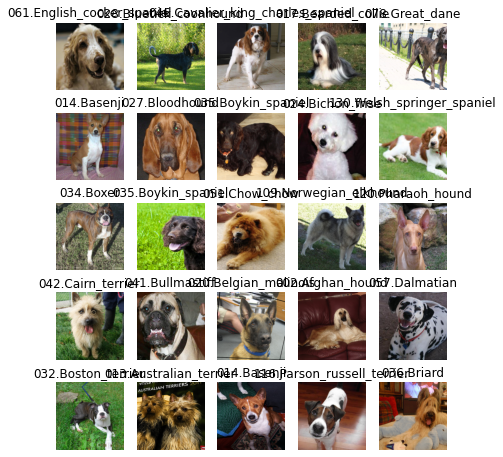

In [16]:
data.show_batch(rows=5, figsize=(7,8))

In [18]:
precision=Precision()
recall=Recall()
AUC=AUROC()
learn = cnn_learner(data, models.resnet50, metrics=(accuracy,precision,recall,AUC))

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [0]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [21]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,precision,recall,auroc,time
0,0.998921,0.533517,0.828743,nan,0.809163,0.271222,02:31
1,0.898581,0.527103,0.835928,0.860285,0.819406,0.377329,02:30
2,0.722068,0.516358,0.846707,nan,0.831191,0.289510,02:29
3,0.608869,0.460331,0.858683,0.874041,0.850066,0.500518,02:29
4,0.486278,0.461681,0.874251,0.898778,0.865831,0.328157,02:30
5,0.373837,0.413625,0.873054,0.892201,0.862442,0.384231,02:30
6,0.276565,0.332994,0.889820,0.904091,0.877378,0.239821,02:31
7,0.231108,0.334753,0.897006,0.910073,0.883145,0.328157,02:31
8,0.182292,0.313739,0.898204,0.909867,0.885747,0.400621,02:32
9,0.152470,0.307872,0.904192,0.916616,0.893725,0.424431,02:31


In [22]:
from tensorflow.keras.applications.resnet50 import ResNet50

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')


102973440/102967424 [==============================] - 2s 0us/step


In [0]:
from tensorflow.keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
def dog_detector(path):
  img = image.load_img(path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
  x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
  x = np.expand_dims(x, axis=0)
  img = preprocess_input(x)
  prediction = np.argmax(ResNet50_model.predict(img))
  return ((prediction <= 268) & (prediction >= 151))


In [64]:
path = '/content/dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg'
dog_detector(path)

True

In [53]:
pip install mtcnn

     |████████████████████████████████| 2.3MB 7.7MB/s 


In [0]:
from mtcnn import MTCNN
def face_detector(path):
  detector = MTCNN()
  image = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
  faces = detector.detect_faces(image)
  return (len(faces)>0)

In [60]:
face_detector('/content/dogImages/test/003.Airedale_terrier/Airedale_terrier_00207.jpg')

False

In [0]:
def detect_breed(path):
  img = image.load_img(path)
  plt.imshow(img)
  if dog_detector(path):
    img1 = open_image(path)
    breed = learn.predict(img1)
    breed_class=str(breed[0])
    breed_name = breed_class[4:]
    print("It's a dog!",'The name of the Breed is:',breed_name)
  elif face_detector(path):
    img1 = open_image(path)
    breed = learn.predict(img1)
    breed_class=str(breed[0])
    breed_name = breed_class[4:]
    print('The person in this picture looks like:',breed_name)
  else:
    print('Not a dog!')
    



It's a dog! The name of the Breed is: Akita


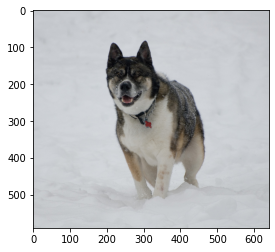

In [69]:
path1 = '/content/dogImages/test/004.Akita/Akita_00244.jpg'
detect_breed(path1)

It's a dog! The name of the Breed is: Akita


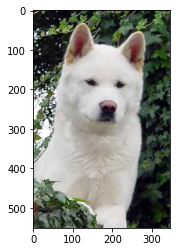

In [71]:
detect_breed('/content/dogImages/test/004.Akita/Akita_00258.jpg')

Not a dog!


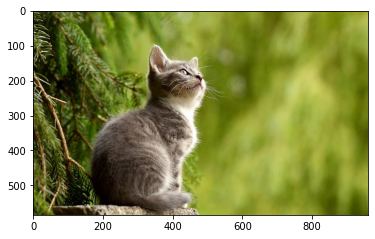

In [72]:
detect_breed('/content/test.webp')

The person in this picture looks like: American_water_spaniel


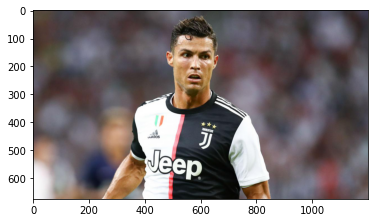

In [73]:
detect_breed('/content/test2.jpg')

The person in this picture looks like: Wirehaired_pointing_griffon


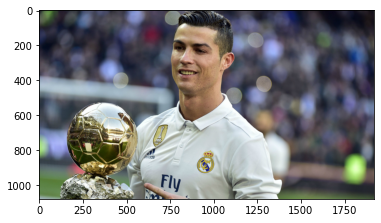

In [74]:
detect_breed('/content/test3.jpg')